In [0]:
SETUP = True

In [2]:
try:
    %tensorflow_version 2.x
except:
    pass

TensorFlow 2.x selected.


In [3]:
if SETUP:
    !pip install -q -U toai
    
    !mkdir -p ~/.kaggle
    !cp kaggle.json ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json
    !pip install -q kaggle
    
    print(__import__("toai").__version__)
    print(__import__("tensorflow").__version__)

     |████████████████████████████████| 153kB 5.3MB/s 
     |████████████████████████████████| 296kB 16.4MB/s 
     |████████████████████████████████| 81kB 10.0MB/s 
     |████████████████████████████████| 552kB 10.6MB/s 
     |████████████████████████████████| 61kB 8.3MB/s 
     |████████████████████████████████| 122kB 19.6MB/s 
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.21.0, but you'll have requests 2.22.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement six~=1.12.0, but you'll have six 1.13.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
0.3.9
2.1.0-rc1


In [4]:
print(__import__("tensorflow").__version__)

2.1.0-rc1


In [5]:
from toai.imports import *
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import os
import cv2
plt.style.use('classic')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
DATA_DIR = Path("data/pokemon")
DATA_DIR.mkdir(parents=True, exist_ok=True)

TEMP_DIR = Path("temp/pokemon")
TEMP_DIR.mkdir(parents=True, exist_ok=True)

DATA_DIR_2 = Path("data_2/pokemon")
DATA_DIR_2.mkdir(parents=True, exist_ok=True)

TEMP_DIR = Path("temp/pokemon_2")
TEMP_DIR.mkdir(parents=True, exist_ok=True)



In [0]:
if SETUP:
    
    DATA_DIR.mkdir(parents=True, exist_ok=True)
    TEMP_DIR.mkdir(parents=True, exist_ok=True)
    kaggle.api.authenticate()
    kaggle.api.dataset_download_files(
        dataset="vishalsubbiah/pokemon-images-and-types", path=DATA_DIR, unzip=True
    )

In [0]:
if SETUP:
    
    DATA_DIR.mkdir(parents=True, exist_ok=True)
    TEMP_DIR.mkdir(parents=True, exist_ok=True)
    kaggle.api.authenticate()
    kaggle.api.dataset_download_files(
        dataset="kvpratama/pokemon-images-dataset", path=DATA_DIR_2, unzip=True
    )

# EDA

In [0]:
df = pd.read_csv(DATA_DIR/'pokemon.csv')

In [0]:
images = Path('data/pokemon/images/images')

In [0]:
images_2 = Path('data_2/pokemon/pokemon/pokemon')

In [12]:
df.head()

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN


In [13]:
df.isna().sum()

Name       0
Type1      0
Type2    404
dtype: int64

In [14]:
df.describe()

,Name,Type1,Type2
count,809,809,405
unique,809,18,18
top,solrock,Water,Flying
freq,1,114,95


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 3 columns):
Name     809 non-null object
Type1    809 non-null object
Type2    405 non-null object
dtypes: object(3)
memory usage: 19.1+ KB


In [0]:
df['path'] = df['Name'].map(lambda x: os.path.join(images,'{}.png'.format(x)))

In [0]:
df.head()

,Name,Type1,Type2,path
0,bulbasaur,Grass,Poison,data/pokemon/images/images/bulbasaur.png
1,ivysaur,Grass,Poison,data/pokemon/images/images/ivysaur.png
2,venusaur,Grass,Poison,data/pokemon/images/images/venusaur.png
3,charmander,Fire,NaN,data/pokemon/images/images/charmander.png
4,charmeleon,Fire,NaN,data/pokemon/images/images/charmeleon.png


Text(0.5, 1.0, 'blastoise')

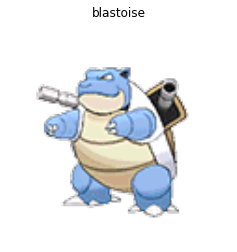

In [0]:
im = Image.open(df['path'][8])
width, height = im.size
plt.imshow(im)
plt.axis("off")
plt.title(df['Name'][8])

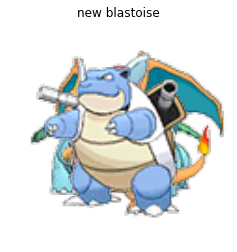

In [524]:
for i in range(9):
  im = Image.open(df['path'][i])
  width, height = im.size
  plt.imshow(im)
  plt.axis("off")
  plt.title('new blastoise')

In [0]:
df.head()

,Name,Type1,Type2,path
0,bulbasaur,Grass,Poison,data/pokemon/images/images/bulbasaur.png
1,ivysaur,Grass,Poison,data/pokemon/images/images/ivysaur.png
2,venusaur,Grass,Poison,data/pokemon/images/images/venusaur.png
3,charmander,Fire,NaN,data/pokemon/images/images/charmander.png
4,charmeleon,Fire,NaN,data/pokemon/images/images/charmeleon.png


In [0]:
BATCH_SIZE = 32
SHUFFLE_SIZE = 1024

In [0]:
#IMG_DIMS = (64, 64, 3)

In [0]:
import attr
from typing import Optional


@attr.s(auto_attribs=True)
class ImageAugmentor:
    level: int = 0
    flips: Optional[str] = None
    rotate: bool = True

    def __call__(self, image: tf.Tensor, label: tf.Tensor) -> tf.Tensor:
        if self.flips in ["horizontal", "both"]:
            image = tf.image.random_flip_left_right(image)
        if self.flips in ["vertical", "both"]:
            image = tf.image.random_flip_up_down(image)

        if self.level > 0:
            lower = 1 - 0.1 * self.level
            upper = 1 + 0.1 * self.level
            min_jpeg_quality = max(0, int((lower - 0.5) * 100))
            max_jpeg_quality = min(100, int((upper - 0.5) * 100))
            image = tf.image.random_jpeg_quality(
                image,
                min_jpeg_quality=min_jpeg_quality,
                max_jpeg_quality=max_jpeg_quality,
            )
            image = tf.image.random_contrast(image, lower=lower, upper=upper)
            image = tf.image.random_saturation(image, lower=lower, upper=upper)
            if self.rotate:
                image = tfa.image.rotate(
                    image, tf.random.uniform((), lower - 1, upper - 1)
                )
            image = tf.clip_by_value(image, 0.0, 1.0)
        return image, label

In [0]:
import attr

@attr.s(auto_attribs=True)
class ImageParser:
    n_channels: int = 3

    def __call__(self, filename: tf.Tensor, label: tf.Tensor) -> tf.Tensor:
        image = tf.image.decode_jpeg(
            tf.io.read_file(filename), channels=self.n_channels
        )
        image = tf.image.convert_image_dtype(image, tf.float32)

        return image, label

In [0]:
@attr.s(auto_attribs=True)
class ImageResizer:
    img_dims: Tuple[int, int, int]
    resize: Optional[str] = None
    crop_adjustment: float = 1

    def __call__(self, image: tf.Tensor, label: tf.Tensor) -> tf.Tensor:
        height, width, _ = self.img_dims
        if self.resize == "stretch":
            image = tf.image.resize(image, (height, width))
        elif self.resize == "crop":
            crop_height, crop_width = [
                int(x * self.crop_adjustment) for x in (height, width)
            ]
            image = tf.image.resize(
                images=image, size=(crop_height, crop_width), preserve_aspect_ratio=True
            )
            image = tf.image.resize_with_crop_or_pad(image, height, width)
        elif self.resize == "random_crop":
            crop_height, crop_width = [
                int(x * self.crop_adjustment) for x in (height, width)
            ]
            image = tf.image.resize(image, (crop_height, crop_width))
            image = tf.image.random_crop(image, self.img_dims)

        return image, label

In [0]:
@attr.s(auto_attribs=True)
class ImageScaler:
    scale_fn: Callable

    def __call__(self, image: tf.Tensor, label: tf.Tensor) -> tf.Tensor:
        return self.scale_fn(image), label

In [0]:
@tf.function
def preprocess_input(x):
    return x / 255.0

In [0]:
train_data = (
    tf.data.Dataset.from_tensor_slices(([str(x) for x in images.glob('**/*')], os.listdir(images)))
    .map(map_func=ImageParser())
    .map(map_func=ImageResizer(IMG_DIMS, "stretch"))
    .repeat()
    .shuffle(SHUFFLE_SIZE)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.experimental.AUTOTUNE)
)

In [0]:
train_data_2 = (
    tf.data.Dataset.from_tensor_slices(([str(x) for x in images_2.glob('**/*')], os.listdir(images_2)))
    .map(map_func=ImageParser())
    .map(map_func=ImageResizer(IMG_DIMS, "stretch"))
    #.map(map_func=ImageAugmentor(flips = 'both'))
    .repeat()
    .shuffle(SHUFFLE_SIZE)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.experimental.AUTOTUNE)
)

tf.Tensor(b'cubone.png', shape=(), dtype=string)
0.0 1.0


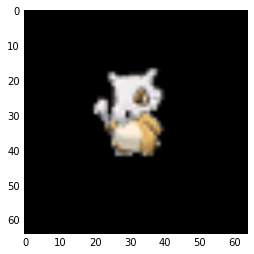

In [344]:
for x, y in train_data.take(1):
    print(y[0])
    print(x[0].numpy().min(), x[0].numpy().max())
    plt.imshow(x.numpy()[0])
    

In [0]:
for x, y in train_data_2.take(1):
    print(y[0])
    print(x[0].numpy().min(), x[0].numpy().max())
    plt.imshow(x.numpy()[0])
    

In [0]:
codings_size = 100

In [0]:
#wasserstein_loss = keras.backend.mean(train_data,)

In [0]:
#discriminator.add_loss(keras.backend.mean(wasserstein_loss) / (120 * 120))

# simple Gan

In [0]:
generator = keras.models.Sequential(
    [
        keras.layers.Dense( 
            256, activation=keras.activations.selu, input_shape=[codings_size]
        ),
        keras.layers.Dense(512, activation=keras.activations.selu),
        keras.layers.Dense(120 * 120 * 3, activation=keras.activations.sigmoid),
        keras.layers.Reshape([120, 120, 3]),
    ]
)

In [0]:
discriminator = keras.models.Sequential(
    [
        keras.layers.Flatten(input_shape=[120, 120, 3]),
        keras.layers.Dense(512, activation=keras.activations.selu),
        keras.layers.Dense(256, activation=keras.activations.selu),
        keras.layers.Dense(1, activation=keras.activations.sigmoid),
    ]
)

In [0]:
gan = keras.models.Sequential([generator, discriminator])


In [0]:
discriminator.compile(
    loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.RMSprop(1e-3)
)
discriminator.trainable = False
gan.compile(
    loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.RMSprop(1e-3)
)

In [0]:
def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)
    plt.figure(figsize=(n_cols * 2, n_rows * 2))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")

In [0]:
def train_gan(gan, dataset, batch_size, codings_size, n_epochs=1):
    generator, discriminator = gan.layers
    for epoch in range(n_epochs):
        print("Epoch {}/{}".format(epoch + 1, n_epochs))
        for train_batch, _ in dataset.take(819 // batch_size):

            # phase 1 - training the discriminator

            noise = tf.random.normal(shape=[batch_size, codings_size])
            generated_images = generator(noise)
            fake_and_real_data = tf.concat([generated_images, train_batch], axis=0)
            fake_and_real_labels = tf.constant([[0.0]] * batch_size + [[1.0]] * batch_size)
            discriminator.trainable = True
            discriminator.train_on_batch(fake_and_real_data, fake_and_real_labels)

            # phase 2 - training the generator

            noise = tf.random.normal(shape=[batch_size, codings_size])
            noise_labels = tf.constant([[1.0]] * batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, noise_labels)
        plot_multiple_images(generated_images, 8)
        plt.show()

In [33]:
len(os.listdir(images_2))

819

In [0]:
train_gan(gan, train_data, BATCH_SIZE, codings_size, 50)

In [0]:
generator = keras.models.Sequential(
    [
        keras.layers.Dense( 
            256, activation=keras.activations.selu, input_shape=[codings_size]
        ),
        keras.layers.Dense(512, activation=keras.activations.selu),
        keras.layers.Dense(256 * 256 * 3, activation=keras.activations.sigmoid),
        keras.layers.Reshape([256, 256, 3]),
    ]
)

In [0]:
#train_data_dcgan = train_data.reshape(-1, 28, 28, 1) * 2.0 - 1.0 

In [0]:
discriminator = keras.models.Sequential(
    [
        keras.layers.Flatten(input_shape=[256, 256, 3]),
        keras.layers.Dense(512, activation=keras.activations.selu),
        keras.layers.Dense(256, activation=keras.activations.selu),
        keras.layers.Dense(1, activation=keras.activations.sigmoid),
    ]
)

In [0]:
gan = keras.models.Sequential([generator, discriminator])


In [0]:
discriminator.compile(
    loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.RMSprop(1e-3)
)
discriminator.trainable = False
gan.compile(
    loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.RMSprop(1e-3)
)

In [0]:
train_gan(gan, train_data_2, BATCH_SIZE, codings_size, 50)

In [0]:
discriminator.compile(
    loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.RMSprop(2e-4)
)
discriminator.trainable = False
gan.compile(
    loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.RMSprop(2e-4)
)

In [0]:
train_gan(gan, train_data_2, BATCH_SIZE, codings_size, 50)

In [0]:
discriminator.compile(
    loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(1e-3)
)
discriminator.trainable = False
gan.compile(
    loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(1e-3 )
)

In [0]:
train_gan(gan, train_data_2, BATCH_SIZE, codings_size, 50)

In [0]:
train_gan(gan, train_data_2, BATCH_SIZE, codings_size, 50)

# DCGAN

In [0]:
IMG_DIMS = (256,256,3)

In [0]:
codings_size = 64

In [0]:
generator = keras.models.Sequential(
    [
        keras.layers.Dense(64 * 64 * 64, input_shape=[codings_size]),
        keras.layers.Reshape([64, 64, 64]),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2DTranspose(
            128,
            kernel_size=5,
            strides=2,
            padding="SAME",
            activation=keras.activations.selu,
        ),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2DTranspose(
            3, kernel_size=5, strides=2, padding="SAME", activation="sigmoid"
        ),
    ]
)

In [500]:
generator.summary()

Model: "sequential_210"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_141 (Dense)            (None, 262144)            17039360  
_________________________________________________________________
reshape_69 (Reshape)         (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization_138 (Bat (None, 64, 64, 64)        256       
_________________________________________________________________
conv2d_transpose_138 (Conv2D (None, 128, 128, 128)     204928    
_________________________________________________________________
batch_normalization_139 (Bat (None, 128, 128, 128)     512       
_________________________________________________________________
conv2d_transpose_139 (Conv2D (None, 256, 256, 3)       9603      
Total params: 17,254,659
Trainable params: 17,254,275
Non-trainable params: 384
______________________________________

In [0]:
discriminator = keras.models.Sequential(
    [
        keras.layers.Conv2D(
            256,
            kernel_size=5,
            strides=2,
            padding="SAME",
            activation=keras.layers.LeakyReLU(0.2),
            input_shape=[256, 256, 3],
        ),
        keras.layers.Dropout(0.4),
        keras.layers.Conv2D(
            512,
            kernel_size=5,
            strides=2,
            padding="SAME",
            activation=keras.layers.LeakyReLU(0.2),
        ),
        keras.layers.Dropout(0.4),
        keras.layers.Flatten(),
        keras.layers.Dense(1, activation=keras.activations.sigmoid),
    ]
)

In [502]:
discriminator.summary()

Model: "sequential_211"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_144 (Conv2D)          (None, 128, 128, 256)     19456     
_________________________________________________________________
dropout_144 (Dropout)        (None, 128, 128, 256)     0         
_________________________________________________________________
conv2d_145 (Conv2D)          (None, 64, 64, 512)       3277312   
_________________________________________________________________
dropout_145 (Dropout)        (None, 64, 64, 512)       0         
_________________________________________________________________
flatten_72 (Flatten)         (None, 2097152)           0         
_________________________________________________________________
dense_142 (Dense)            (None, 1)                 2097153   
Total params: 5,393,921
Trainable params: 5,393,921
Non-trainable params: 0
__________________________________________

In [0]:
gan = keras.models.Sequential([generator, discriminator])

In [0]:
discriminator.compile(
    loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.RMSprop(1e-3)
)
discriminator.trainable = False
gan.compile(
    loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.RMSprop(1e-3)
)

In [0]:
#train_data_dcgan = train_data.reshape(-1, 28, 28, 1) * 2.0 - 1.0 

In [0]:
train_gan(gan, train_data_2, BATCH_SIZE, codings_size, 50)

In [0]:
#IMG_DIMS=(28,28,3)

In [0]:
def wasserstein_loss(y_true, y_pred):
  return mean(y_true * y_pred)